In [1]:
from analysis.plot_comparison_statistics_multiple_experiments import plot_comparison_metrics

2023-08-22 12:13:28.529783: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Initial tests to figure out correct LR for OMG -MEGA

No relaxation steps

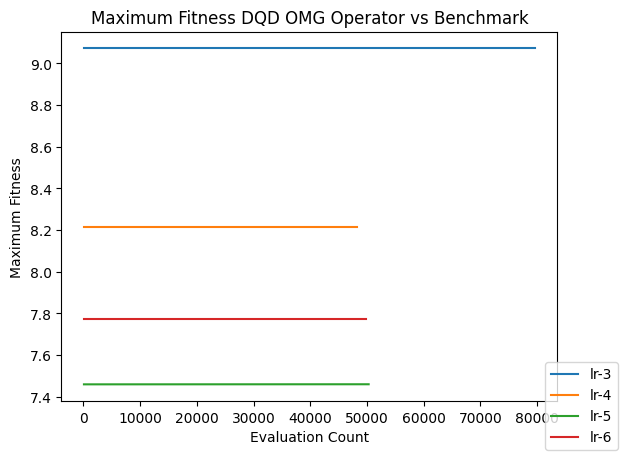

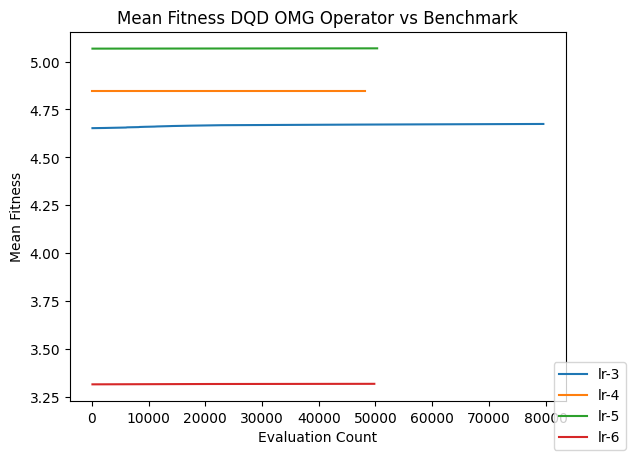

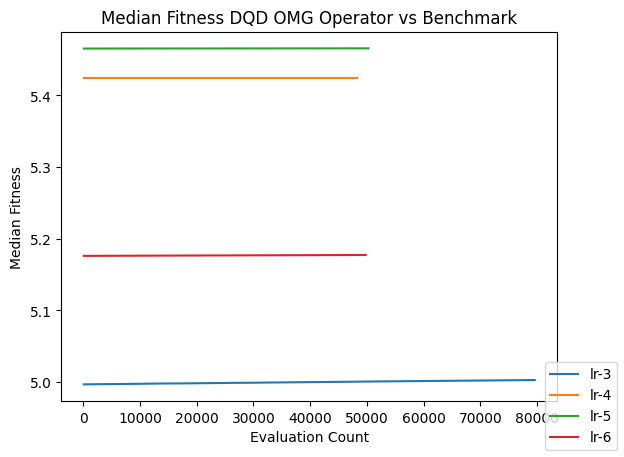

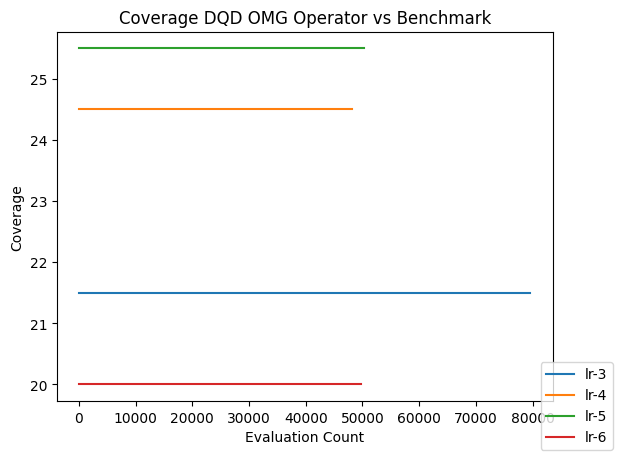

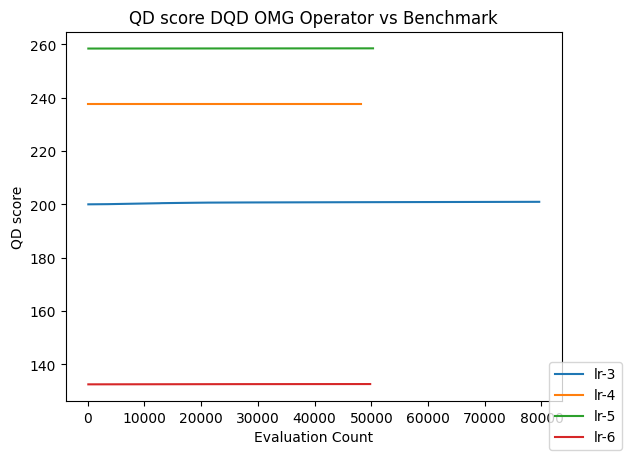

In [2]:
experiments_list = [
    "20230820_00_23_TiO2_500k_lr-3",
    "20230820_00_23_TiO2_500k_lr-4",
    "20230820_00_39_TiO2_500k_lr-5",
    "20230820_00_39_TiO2_500k_lr-6",
    ]
plot_labels = ["lr-3", "lr-4", "lr-5", "lr-6"]
plot_comparison_metrics(experiments_list, plot_labels)

Since all lrs were on different scale normalise to see trend

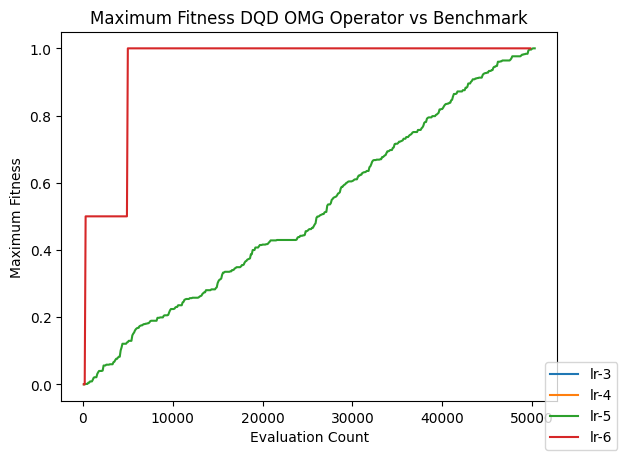

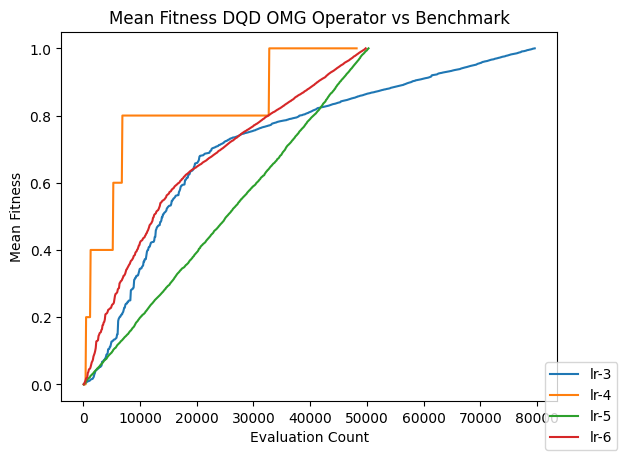

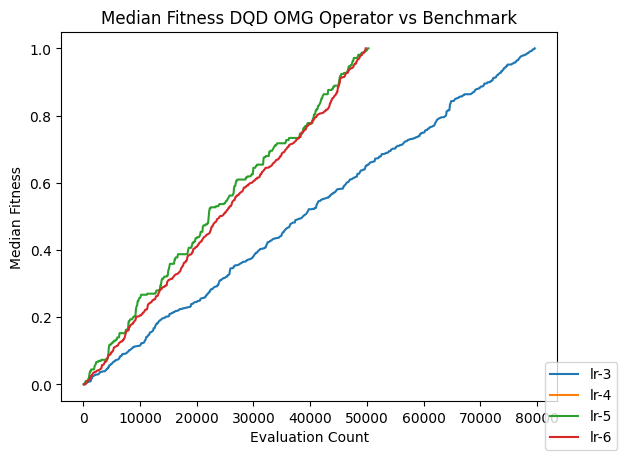

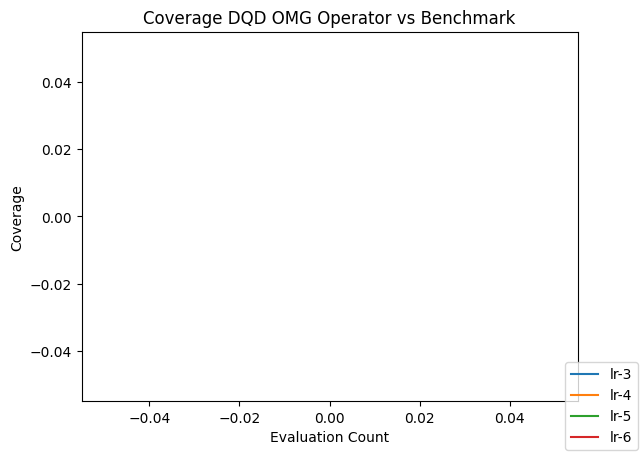

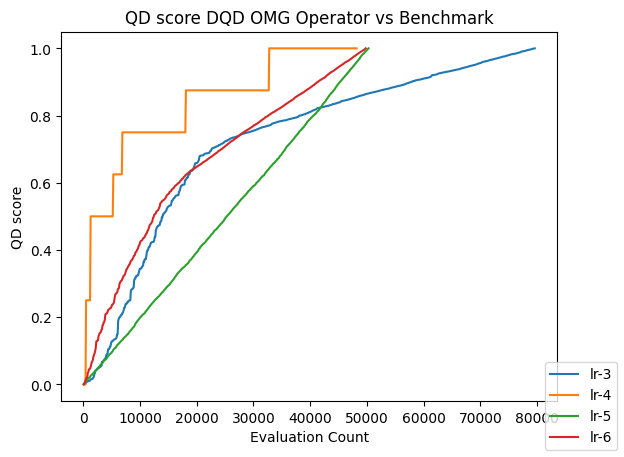

In [3]:
experiments_list = [
    "20230820_00_23_TiO2_500k_lr-3",
    "20230820_00_23_TiO2_500k_lr-4",
    "20230820_00_39_TiO2_500k_lr-5",
    "20230820_00_39_TiO2_500k_lr-6",
    ]
plot_labels = ["lr-3", "lr-4", "lr-5", "lr-6"]
plot_comparison_metrics(experiments_list, plot_labels, normalise=True)

Select lr-5 for experiments to see behavior of relaxation with this lr

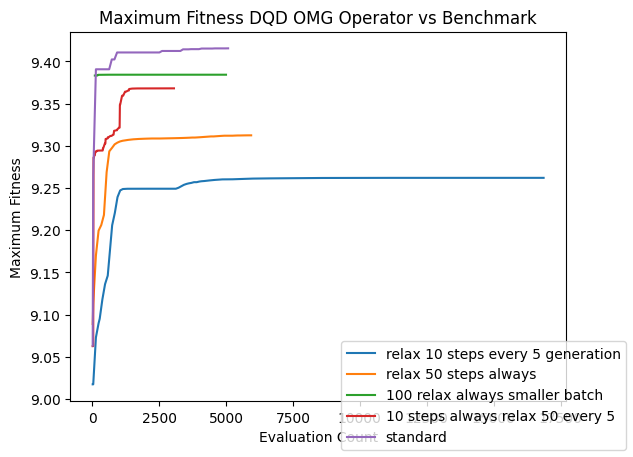

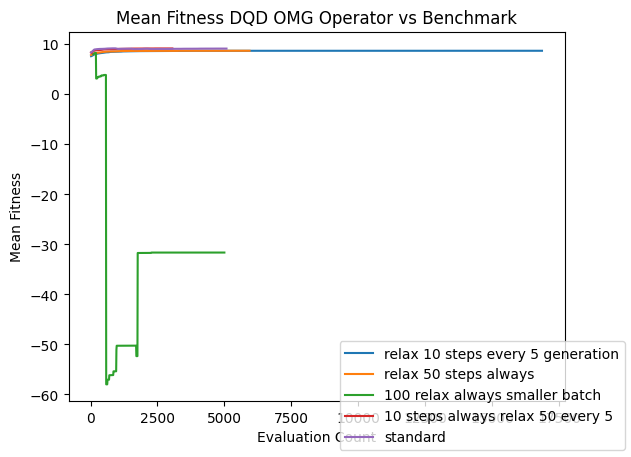

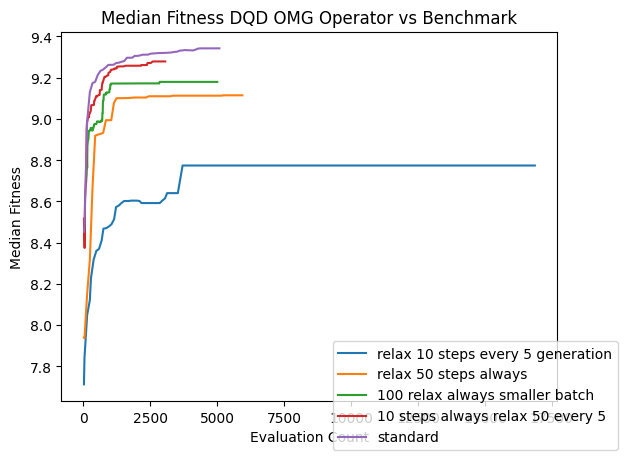

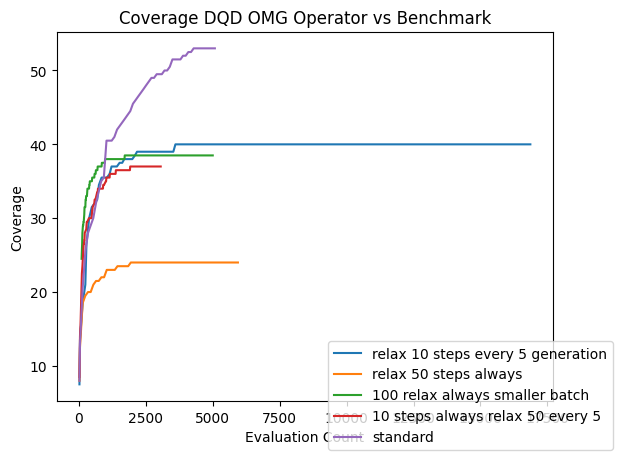

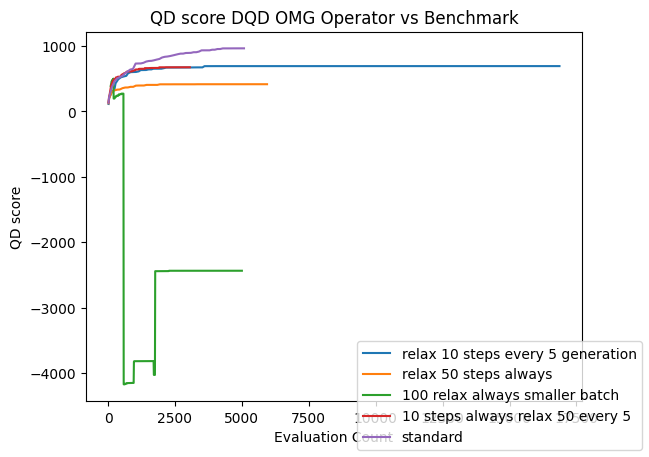

In [4]:
experiments_list = [
"20230820_14_36_TiO2_500k_lr-5_30_relax_steps_whole_archive_relax_10_steps_every_5",
"20230820_14_36_TiO2_500k_lr-5_50_relax_steps_always",
"20230820_15_53_TiO2_500k_lr-5_100_relax_steps_always_more_init_smaller_batch",
"20230820_18_20_TiO2_5k_dqd_lr05_10_steps_relax_and_50_every_5_generations",
        "20230813_01_48_TiO2_200_niches_for benchmark_100_relax_2",
    ]
plot_labels = ["relax 10 steps every 5 generation", "relax 50 steps always", "100 relax always smaller batch", "10 steps always relax 50 every 5", "standard"]
plot_comparison_metrics(experiments_list, plot_labels)

Conclusion: all perform worse than benchmark - try different lr 0.05 taken from Neurips paper implementation

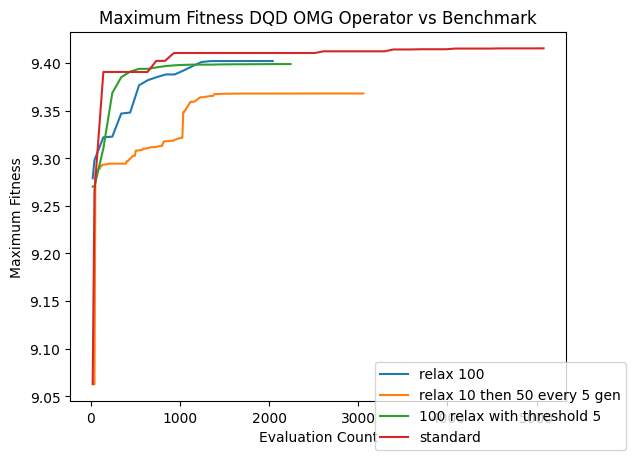

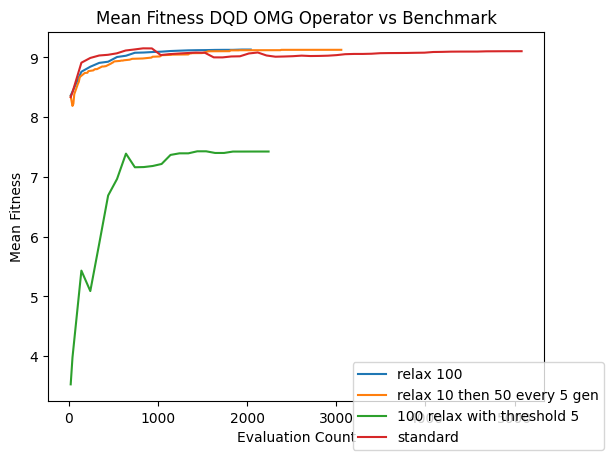

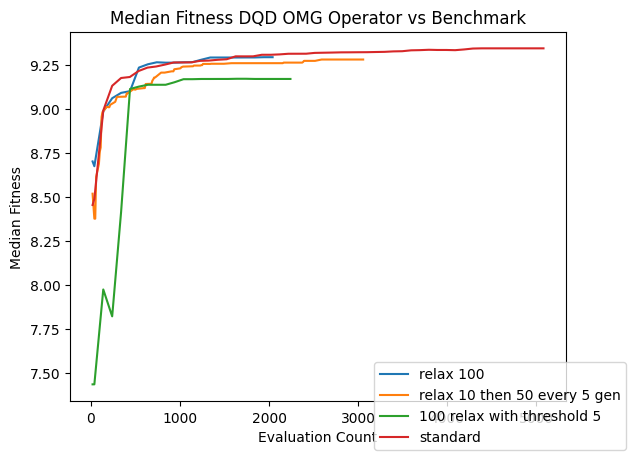

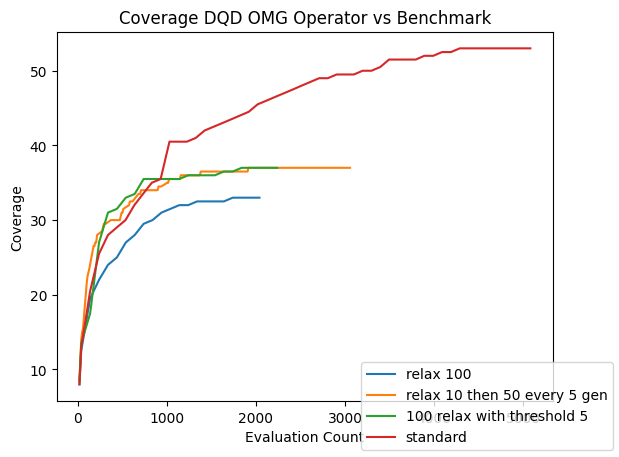

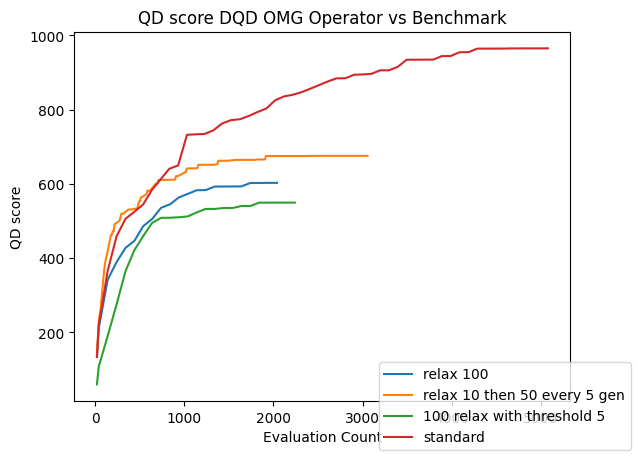

In [5]:
experiments_list = [
    "20230821_02_43_TiO2_500k_lr05_100_relax_steps_always",
    "20230820_18_20_TiO2_5k_dqd_lr05_10_steps_relax_and_50_every_5_generations",
    "20230821_11_30_TiO2_500k_lr05_100_relax_steps_always_with_force_threshold",
    # "20230821_18_36_TiO2_500k_lr1_100_relax_steps_always_new_normalisation",
    "20230813_01_48_TiO2_200_niches_for benchmark_100_relax_2",
    ]
plot_labels = ["relax 100", "relax 10 then 50 every 5 gen", "100 relax with threshold 5", "standard"]
plot_comparison_metrics(experiments_list, plot_labels)

Conclusion: Mix of relaxation works better than just relaxing for 100

Add relaxation of 100 steps always to mimic standard benchmark and try bigger lr

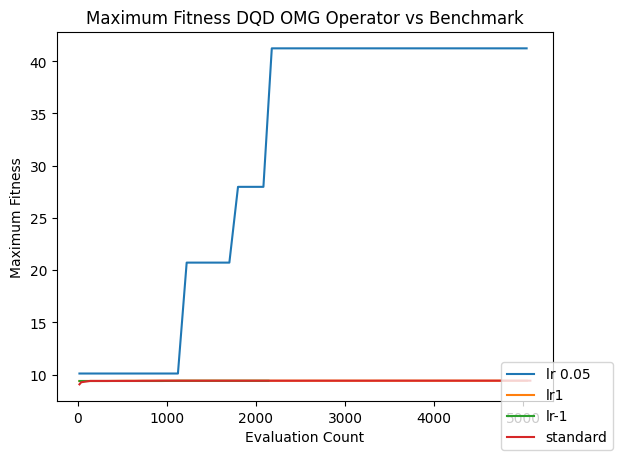

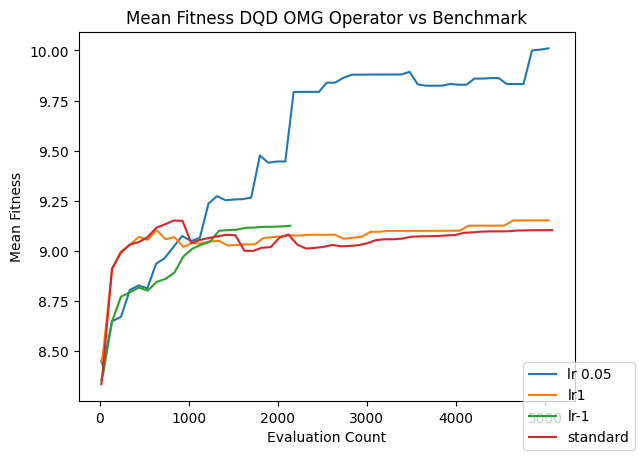

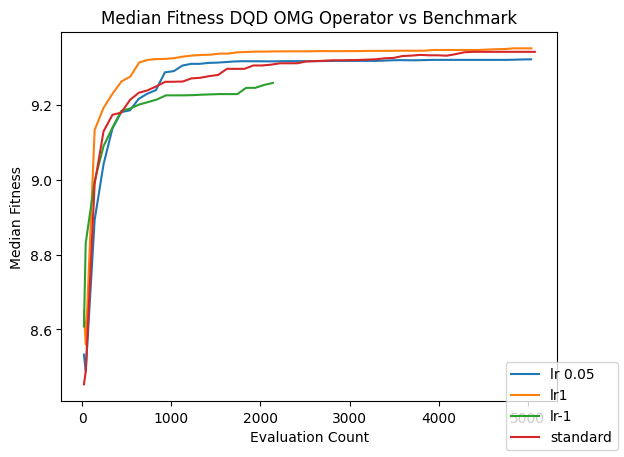

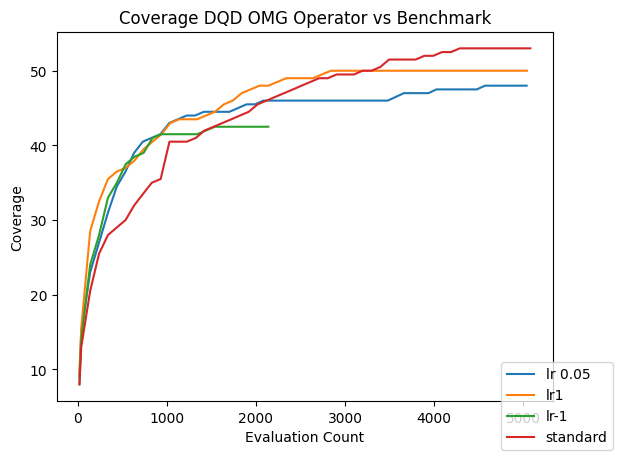

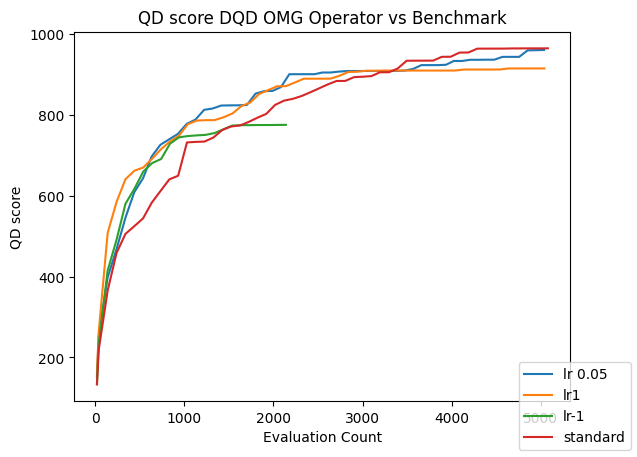

In [6]:
experiments_list = [
    "20230821_00_58_TiO2_500k_lr05_100_relax_steps_always",
    "20230821_09_07_TiO2_500k_lr1_100_relax_steps_always",
    "20230821_09_21_TiO2_500k_lr-1_100_relax_steps_always",
    "20230813_01_48_TiO2_200_niches_for benchmark_100_relax_2",
    ]
plot_labels = ["lr 0.05", "lr1", "lr-1", "standard"]
plot_comparison_metrics(experiments_list, plot_labels)

Conclusion: lr 1 nd 0.05 work best but 0.05 produces more funky individuals so proceed with lr 1 i.e no scaling from gaussian

Fix normalisation - [previously instead of normalising vector I was normalising between 0-1. Comapre on lr1 before and after

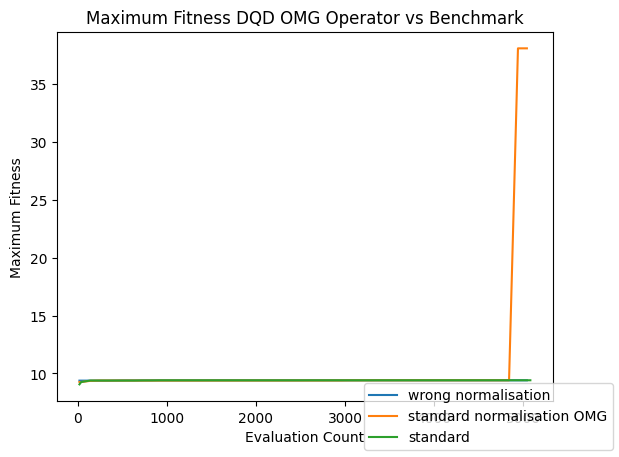

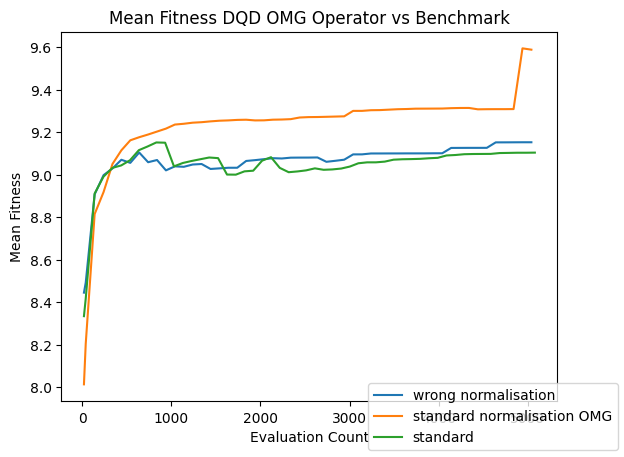

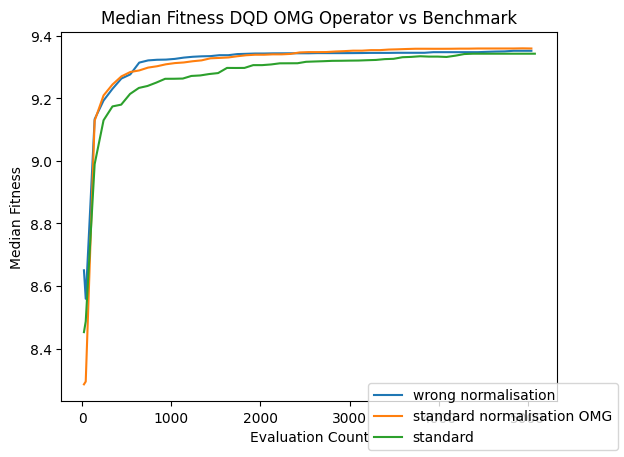

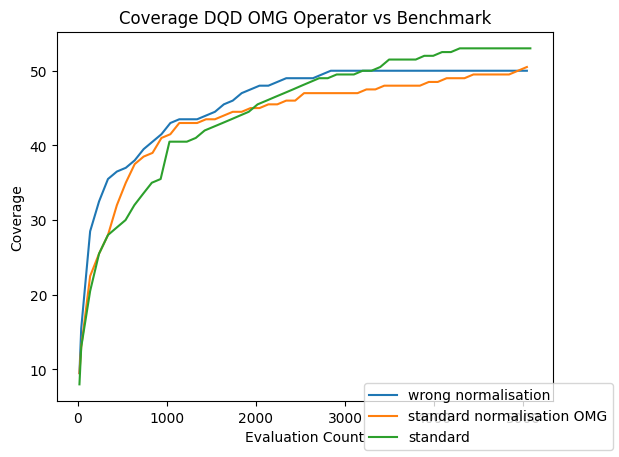

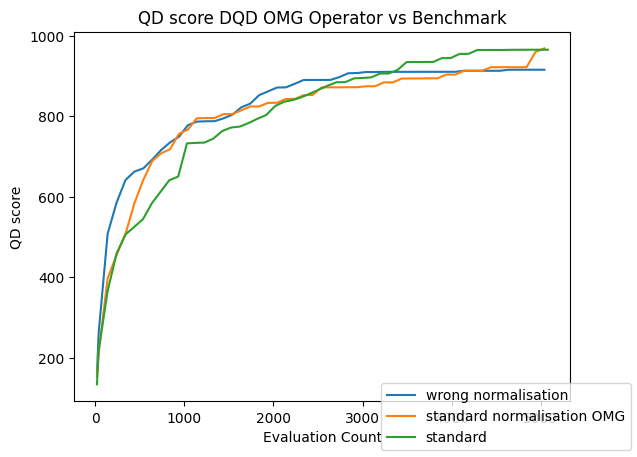

In [7]:
experiments_list = [
    "20230821_09_07_TiO2_500k_lr1_100_relax_steps_always",
    "20230821_18_36_TiO2_500k_lr1_100_relax_steps_always_new_normalisation",
    "20230813_01_48_TiO2_200_niches_for benchmark_100_relax_2",
]

plot_labels = ["wrong normalisation", "standard normalisation OMG",  "standard"]
plot_comparison_metrics(experiments_list, plot_labels)

New normalisation works similarly in terms of performance as the previous one, but since the previous one was non-standard we proceed with the new one.

Experiment: Different relaxations with lr 1

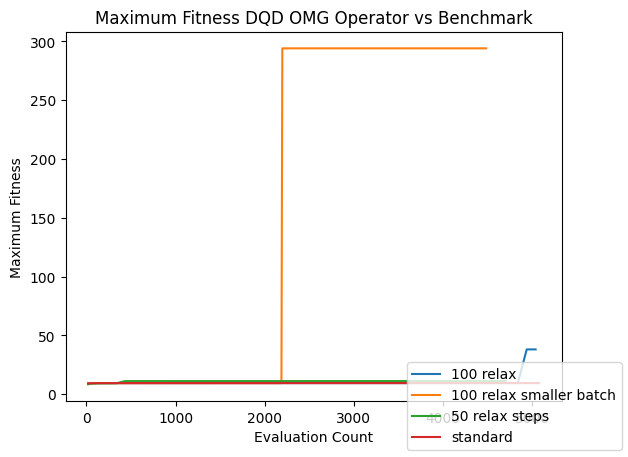

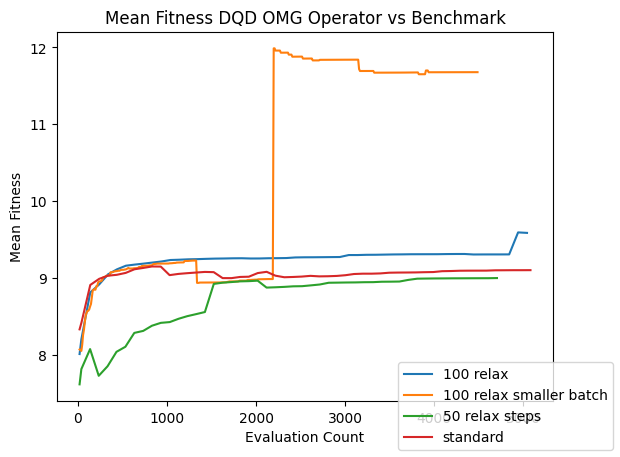

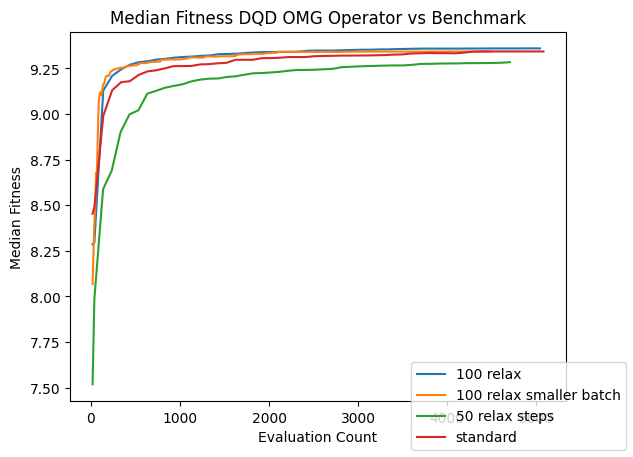

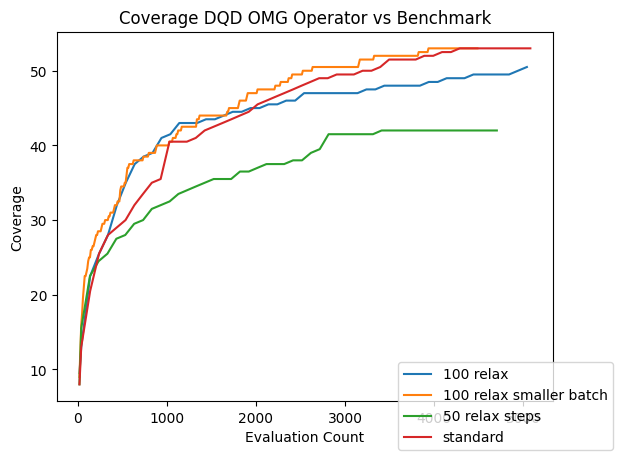

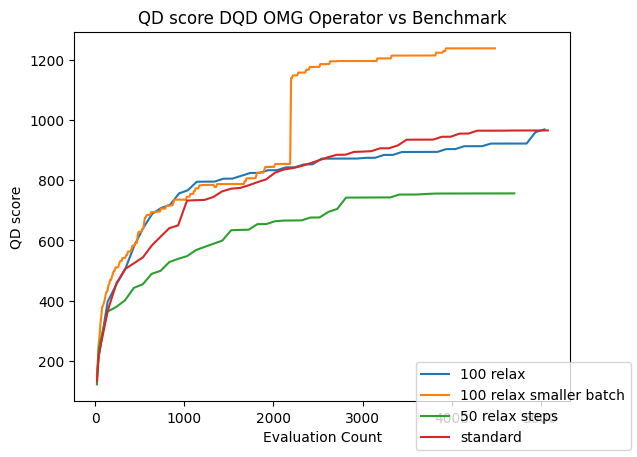

In [8]:
experiments_list = [
    "20230821_18_36_TiO2_500k_lr1_100_relax_steps_always_new_normalisation",
    "20230821_23_22_TiO2_500k_lr1_100_relax_steps_always_new_normalisation_batch_10",
    "20230821_23_42_TiO2_500k_lr1_50_relax_steps_always_new_norm",
    "20230813_01_48_TiO2_200_niches_for benchmark_100_relax_2",
]

plot_labels = ["100 relax", "100 relax smaller batch", "50 relax steps", "standard"]
plot_comparison_metrics(experiments_list, plot_labels)

Conclusion: 50 relax steps works worse. Between 100 relax steps smaller batch works much better as it doesn't get stuck, and reaches same coverage as standard benchmark

Adding CMAES to the mix

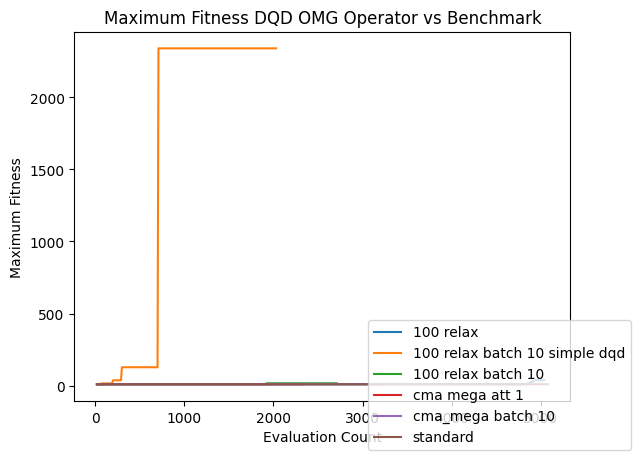

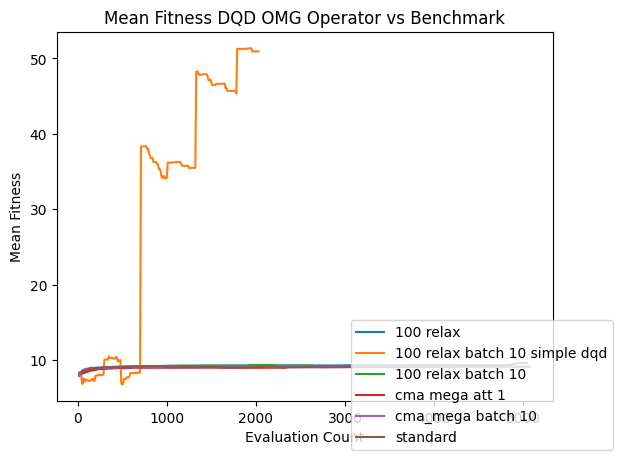

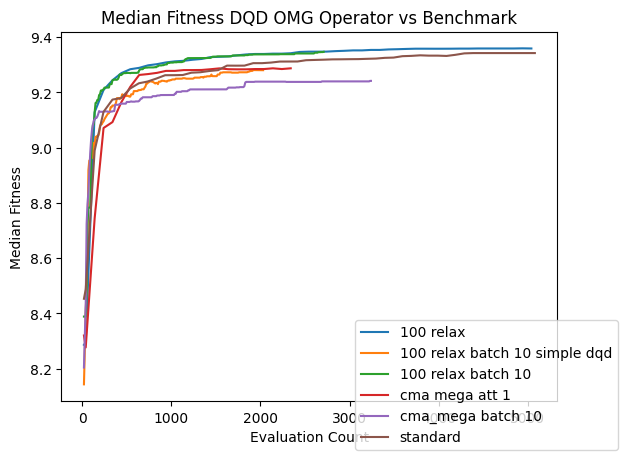

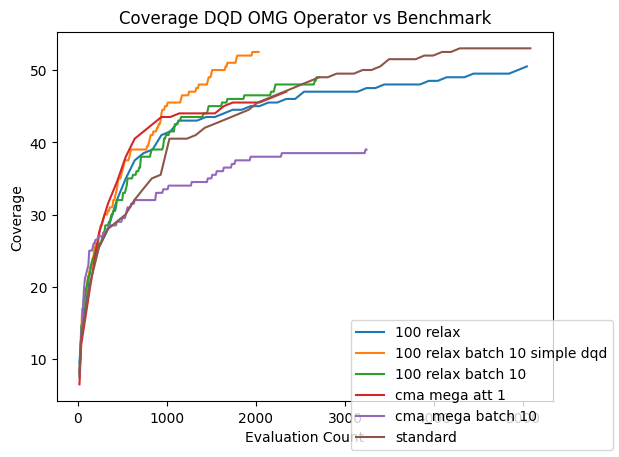

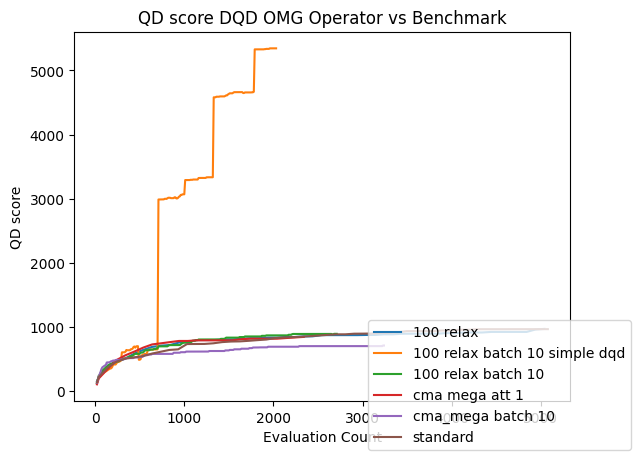

In [12]:
experiments_list = [
    "20230821_18_36_TiO2_500k_lr1_100_relax_steps_always_new_normalisation",
    "20230822_13_59_TiO2_500k_lr1_100_relax_steps_always_new_normalisation_batch_10_new_dqd",
    "20230821_23_48_TiO2_500k_lr1_100_relax_steps_always_new_normalisation_batch_10",
    "20230822_00_32_TiO2_500k_lr1_100_relax_steps_always_new_normalisation_cma_mega",
    "20230822_10_19_TiO2_500k_lr1_100_relax_steps_always_new_normalisation_cma_mega_batch_10",
    "20230813_01_48_TiO2_200_niches_for benchmark_100_relax_2",
]

plot_labels = ["100 relax","100 relax batch 10 simple dqd", "100 relax batch 10",
               "cma mega att 1", "cma_mega batch 10", "standard"]
plot_comparison_metrics(experiments_list, plot_labels)

Adding a CMA-ES loop exactly like in DQD paper

Comapre number of relaxation steps onl

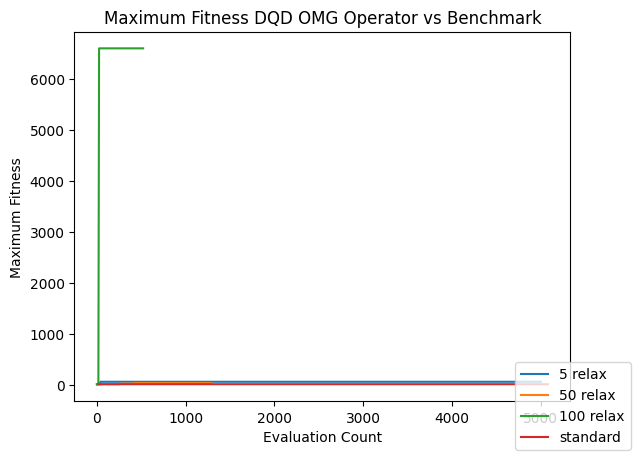

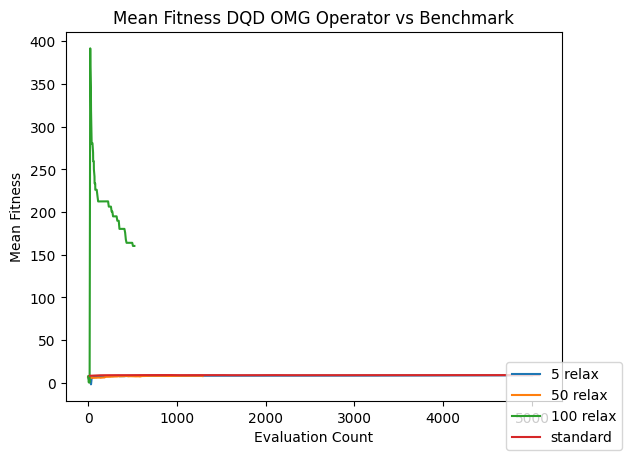

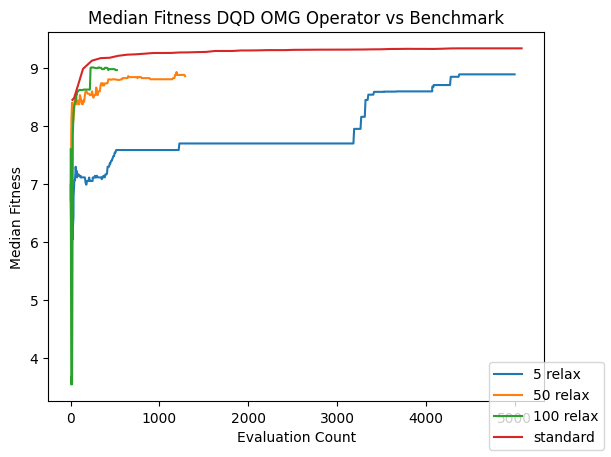

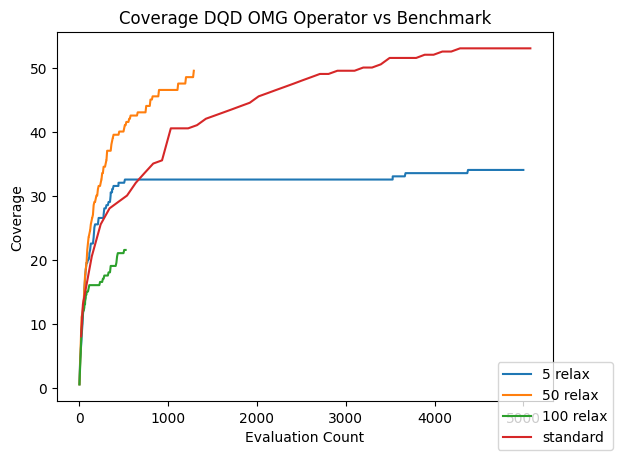

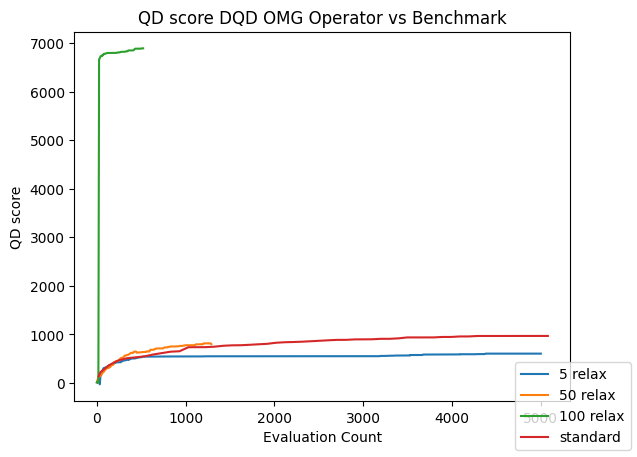

In [18]:
experiments_list = [
    "20230822_21_45_TiO2_cma_5_relaxation_lr1_sigma_1",
    "cma_50_relaxation_lr1_sigma_1",
    "cma_100_relaxation_lr1_sigma1",
    "20230813_01_48_TiO2_200_niches_for benchmark_100_relax_2",
]

plot_labels = ["5 relax", "50 relax", "100 relax", "standard"]
plot_comparison_metrics(experiments_list, plot_labels)